In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
keras.__version__

'2.8.0'

In [ ]:
train_data_path = '/content/drive/MyDrive/FINAL YEAR PROJECT/dataset/train'
validation_data_path = '/content/drive/MyDrive/FINAL YEAR PROJECT/dataset/test'

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 

In [ ]:

training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [ ]:

training_data = training_datagen.flow_from_directory(train_data_path, target_size=(150, 150), 
                                                     batch_size=32, class_mode='binary')  
 

Found 1875 images belonging to 35 classes.


In [ ]:
training_data.class_indices
 

{'aloo tikki': 0,
 'apple': 1,
 'banana chips': 2,
 'bread': 3,
 'chakli ': 4,
 'chapati': 5,
 'chole': 6,
 'dosa': 7,
 'egg': 8,
 'french fries': 9,
 'ginger': 10,
 'gujiya': 11,
 'gulab jamun': 12,
 'idli': 13,
 'jalebi': 14,
 'kaju katli': 15,
 'kashmiri apple': 16,
 'khaman': 17,
 'lassi': 18,
 'lemon': 19,
 'limes': 20,
 'medu vada': 21,
 'modak': 22,
 'naan': 23,
 'pasta': 24,
 'pear': 25,
 'pear williams': 26,
 'pizza': 27,
 'poha': 28,
 'rasgulla': 29,
 'samosa': 30,
 'thepla': 31,
 'vada pav': 32,
 'walnut': 33,
 'watermelon': 34}

In [ ]:

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 795 images belonging to 35 classes.


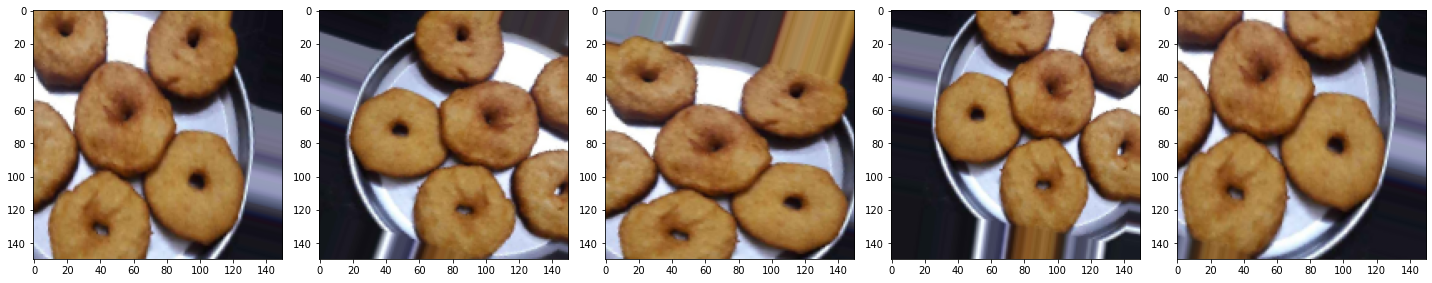

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:

cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=35, activation='softmax')
])
 

In [ ]:

cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 

In [ ]:

history = cnn_model.fit(training_data, 
                          epochs=90, 
                          verbose=1, 
                          validation_data= valid_data,) 

Epoch 1/90
 6/59 [==>...........................] - ETA: 5:18 - loss: 3.5254 - accuracy: 0.0156

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


59/59 [==============================] - 639s 11s/step - loss: 3.3003 - accuracy: 0.0976 - val_loss: 2.9835 - val_accuracy: 0.2264
Epoch 2/90
59/59 [==============================] - 44s 750ms/step - loss: 2.7847 - accuracy: 0.2357 - val_loss: 2.2000 - val_accuracy: 0.4465
Epoch 3/90
59/59 [==============================] - 44s 750ms/step - loss: 2.1743 - accuracy: 0.4091 - val_loss: 1.6446 - val_accuracy: 0.5874
Epoch 4/90
59/59 [==============================] - 44s 745ms/step - loss: 1.8953 - accuracy: 0.4683 - val_loss: 1.4331 - val_accuracy: 0.6566
Epoch 5/90
59/59 [==============================] - 44s 741ms/step - loss: 1.7278 - accuracy: 0.5157 - val_loss: 1.3574 - val_accuracy: 0.6264
Epoch 6/90
59/59 [==============================] - 43s 740ms/step - loss: 1.6400 - accuracy: 0.5419 - val_loss: 1.2441 - val_accuracy: 0.6679
Epoch 7/90
59/59 [==============================] - 43s 736ms/step - loss: 1.5460 - accuracy: 0.5680 - val_loss: 1.1141 - val_accuracy: 0.6956
Epoch 8/90


In [ ]:
model = cnn_model
# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

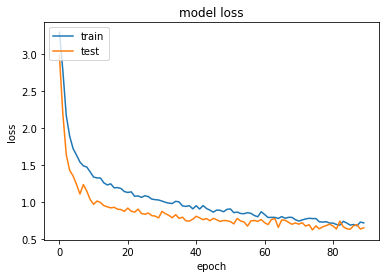

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 

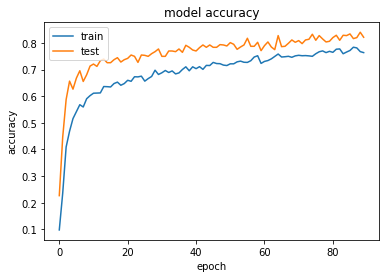

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import os
 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

poha


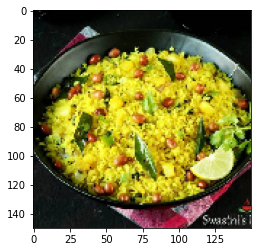

In [ ]:
dic = {0:'apple red',
 1:'jalebi',
 2: 'pear',
 3:'pear williams',
 28: 'poha',
 5: 'rasgulla',
 6: 'watermelon'
 }
image_url = '/content/drive/MyDrive/FINAL YEAR PROJECT/dataset/test4.jpg'
test_image = load_img(image_url, target_size = (150, 150)) 
test_image1 = img_to_array(test_image)/255 
test_image = np.expand_dims(test_image1, axis = 0) 
result = cnn_model.predict(test_image).round(3) 
pred = np.argmax(result) 
print(dic[pred])
plt.figure()
plt.imshow(test_image1) 
plt.show()  